In [2]:
!pip install surprise

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 11.8 MB 4.7 MB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp37-cp37m-linux_x86_64.whl size=1633976 sha256=703e03b98c9e619e01210aeef7963c82965aaf3f94c421bdb52ebee1efa55d2b
  Stored in directory: /root/.cache/pip/wheels/76/44/74/b498c42be47b2406bd27994e16c5188e337c657025ab400c1c
Successfully built scikit-surprise


In [3]:
import pandas as pd
import numpy as np
from surprise import KNNBasic,Reader, Dataset, SVD
from surprise.model_selection import KFold, cross_validate
import matplotlib.pyplot as plt

In [4]:
reader = Reader(line_format='user item rating timestamp', sep=',', skip_lines = 1)
data = Dataset.load_from_file('./ratings_small.csv', reader=reader)

In [5]:
pmf_svd = SVD()
cv_pmf = cross_validate(pmf_svd, data, measures=['RMSE', 'MAE'], cv=5, verbose=True);

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8979  0.9024  0.8896  0.8926  0.9018  0.8969  0.0050  
MAE (testset)     0.6919  0.6937  0.6875  0.6877  0.6922  0.6906  0.0025  
Fit time          8.87    5.46    5.25    5.32    5.23    6.03    1.42    
Test time         0.16    0.25    0.18    0.23    0.31    0.23    0.05    


In [6]:
sim_options = {'user_based': True}
user_based_cf = KNNBasic(sim_options=sim_options)
cv_ub = cross_validate(user_based_cf, data, measures=['RMSE', 'MAE'], cv=5, verbose=True);

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9714  0.9643  0.9695  0.9656  0.9775  0.9696  0.0047  
MAE (testset)     0.7459  0.7428  0.7451  0.7433  0.7481  0.7450  0.0019  
Fit time          0.20    0.23    0.24    0.23    0.25    0.23    0.02    
Test time         1.86    1.75    1.73    1.83    1.69    1.77    0.06    


In [7]:
sim_options = {'user_based': False}
item_based_cf = KNNBasic(sim_options=sim_options)
cv_ib = cross_validate(item_based_cf, data, measures=['RMSE', 'MAE'], cv=5, verbose=True);

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9432  0.9312  0.9347  0.9361  0.9317  0.9354  0.0043  
MAE (testset)     0.7260  0.7172  0.7208  0.7234  0.7204  0.7216  0.0030  
Fit time          5.53    4.95    4.34    4.30    4.92    4.81    0.45    
Test time         7.45    7.45    7.57    7.62    7.66    7.55    0.09    


In [8]:
pmf = ('PMF', cv_pmf['test_mae'].mean(), cv_pmf['test_rmse'].mean())
user_cf = ('User based CF', cv_ub['test_mae'].mean(), cv_ub['test_rmse'].mean())
item_cf = ('Item based CF', cv_ib['test_mae'].mean(), cv_ib['test_rmse'].mean())

results = [pmf, user_cf, item_cf]

print("%-12s %12s %12s" % ('Algorithm', 'MAE Mean', 'RMSE Mean'))

for res in results:
  if res[0] == 'PMF':
    print("%-8s %14.3f %12.3f" % (res[0], res[1], res[2]))
  else:
    print("%-8s %9.3f %12.3f" % (res[0], res[1], res[2]))

Algorithm        MAE Mean    RMSE Mean
PMF               0.691        0.897
User based CF     0.745        0.970
Item based CF     0.722        0.935


In [9]:
similarities = ['cosine', 'msd', 'pearson']
measures = ['RMSE', 'MAE']
run_results = {
    'ucf': dict(),
    'icf': dict()
}

for similarity in similarities:
  user_based_cf = KNNBasic(sim_options={'name': similarity, 'user_based': True})
  item_based_cf = KNNBasic(sim_options={'name': similarity, 'user_based': False})

  print(f"Calculating {similarity} for User Based CF")
  cross_validate_user_based_cf = cross_validate(user_based_cf, data, measures, verbose=True, cv=5)

  print(f"Calculating {similarity} for Item Based CF")
  cross_validate_item_based_cf = cross_validate(item_based_cf, data, measures, verbose=True, cv=5)

  run_results['ucf'][similarity] = cross_validate_user_based_cf
  run_results['icf'][similarity] = cross_validate_item_based_cf

Calculating cosine for User Based CF
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.0044  0.9912  0.9937  0.9937  0.9888  0.9944  0.0053  
MAE (testset)     0.7766  0.7638  0.7666  0.7677  0.7662  0.7682  0.0044  
Fit time          0.40    0.44    0.51    0.52    0.51    0.48    0.05    
Test time         1.83    1.72    1.73    1.81    1.84    1.79    0.05    
Calculating cosine for Item Based CF
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matr

In [10]:
plot_data = {
    'mae': {
      'cosine': [],
      'msd': [],
      'pearson': []
    },
    'rmse': {
      'cosine': [],
      'msd': [],
      'pearson': []
    }
}

for k, v in run_results.items():
  for key, result in run_results[k].items():
    plot_data['mae'][key].append(result['test_mae'].mean())
    plot_data['rmse'][key].append(result['test_rmse'].mean())

In [12]:
plot_data

{'mae': {'cosine': [0.7674486524952264, 0.7752965762464917],
  'msd': [0.7452181488879019, 0.7207881623539836],
  'pearson': [0.7737270583307156, 0.7685606479185546]},
 'rmse': {'cosine': [0.9935316421828772, 0.9953435725546995],
  'msd': [0.9692476543334898, 0.9345055648299176],
  'pearson': [0.9997746071379658, 0.9902246922413884]}}

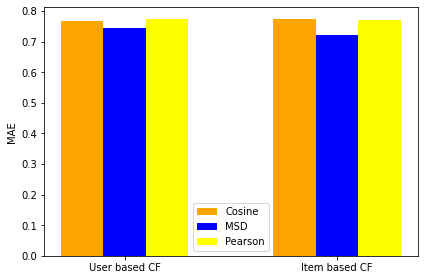

In [11]:
labels = ['User based CF', 'Item based CF']

x = np.arange(len(labels))  # the label locations
width = 0.2

# plot data in grouped manner of bar type
plt.bar(x-0.2, plot_data['mae']['cosine'], width, color='orange')
plt.bar(x, plot_data['mae']['msd'], width, color='blue')
plt.bar(x+0.2, plot_data['mae']['pearson'], width, color='yellow')

plt.xticks(x, labels)
plt.ylabel("MAE")
plt.yticks()
plt.legend(["Cosine", "MSD", "Pearson"])
plt.tight_layout()

plt.show()

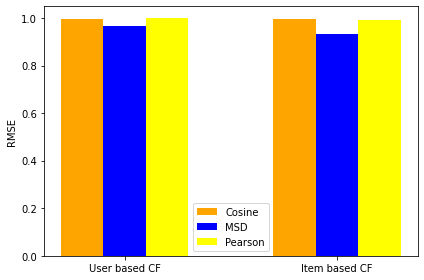

In [13]:
labels = ['User based CF', 'Item based CF']

x = np.arange(len(labels))  # the label locations
width = 0.2

# plot data in grouped manner of bar type
plt.bar(x-0.2, plot_data['rmse']['cosine'], width, color='orange')
plt.bar(x, plot_data['rmse']['msd'], width, color='blue')
plt.bar(x+0.2, plot_data['rmse']['pearson'], width, color='yellow')

plt.xticks(x, labels)
plt.ylabel("RMSE")
plt.yticks()
plt.legend(["Cosine", "MSD", "Pearson"])
plt.tight_layout()

plt.show()

In [14]:
min_k_value = 1
mean = 99999
ucf_k_results = []

for i in range(20):
  knn_ucf = KNNBasic(sim_options={'user_based': True}, k=i)
  cv_knn_ucf = cross_validate(knn_ucf, data, measures, verbose=True, cv=5)

  curr_mean = cv_knn_ucf['test_rmse'].mean()
  if curr_mean < mean:
    mean = curr_mean
    min_k_value = i
  ucf_k_results.append(curr_mean)
  print(i)

print(min_k_value, mean)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.0697  1.0595  1.0638  1.0501  1.0472  1.0580  0.0084  
MAE (testset)     0.8584  0.8488  0.8544  0.8450  0.8425  0.8498  0.0059  
Fit time          0.17    0.22    0.23    0.21    0.21    0.21    0.02    
Test time         0.90    0.95    0.85    0.87    1.07    0.93    0.08    
0
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing

In [16]:
min_k_value = 1
mean = 99999
icf_k_results = []

for i in range(20):
  knn_ucf = KNNBasic(sim_options={'user_based': False}, k=i)
  cv_knn_ucf = cross_validate(knn_ucf, data, measures, verbose=True, cv=5)

  curr_mean = cv_knn_ucf['test_rmse'].mean()
  if curr_mean < mean:
    mean = curr_mean
    min_k_value = i
  icf_k_results.append(curr_mean)

print(min_k_value, mean)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.0565  1.0549  1.0668  1.0555  1.0566  1.0581  0.0044  
MAE (testset)     0.8488  0.8488  0.8549  0.8468  0.8498  0.8498  0.0027  
Fit time          6.44    5.17    4.90    5.05    5.34    5.38    0.55    
Test time         4.84    5.02    4.93    5.63    5.15    5.11    0.28    
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing s

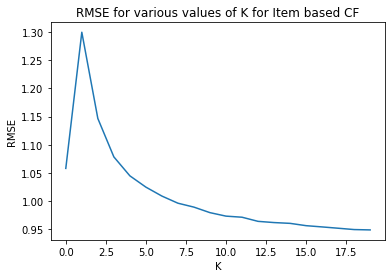

In [17]:
plt.plot(icf_k_results)
plt.xlabel("K")
plt.ylabel("RMSE")
plt.title("RMSE for various values of K for Item based CF")
plt.show()

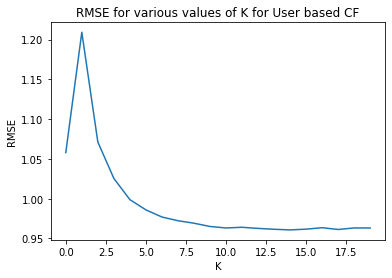

In [18]:
plt.plot(ucf_k_results)
plt.xlabel("K")
plt.ylabel("RMSE")
plt.title("RMSE for various values of K for User based CF")
plt.show()

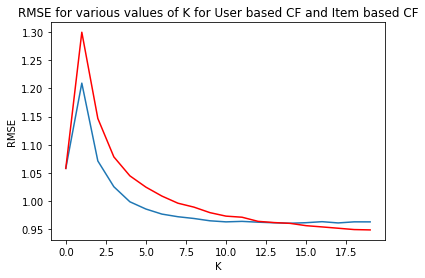

In [19]:
plt.plot(ucf_k_results)
plt.plot(icf_k_results, color='r')
plt.xlabel("K")
plt.ylabel("RMSE")
plt.title("RMSE for various values of K for User based CF and Item based CF")
plt.show()